In [1]:
# этот ноутбук относится к лабе 3.1.3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyperclip import copy
def latex(d: pd.DataFrame, print_output=False) -> None:
  (print if print_output else copy)(d.to_latex(index=False))

### Константы
расстояние, на котором перестают притягиваться
r = 1.785 # мм +- 0.003

широта долгопрудного: 56 сш

период колебания кольца: 
95.56 / 10с

вес оторвавшийся в методе Б:
257.810г

масса 30 шариков:
24.923г

In [2]:
# диаметры  шариков:

dd = np.array([
  0.6, 0.59, 0.6, 0.59, 0.58, 0.59, 0.59, 0.6, 0.60, 0.6
])
d = np.average(dd)
R = d/2

In [3]:
m = 24.923 / 30
r = 1.785
g = 981 # см/с^2
mk_a = np.sqrt(m*g*r**4/6)
m_max = 257.810
F_b = m_max * g
F_0 = F_b / 1.08
mk_b = (F_0 * d**4 / 6)**0.5
# print(mk_b, mk_a, F_b)
delta_mk_b = mk_b - ((258.8 * g / 1.08) * d**4 / 6)**0.5
delta_mk_b

-0.13370845869673076

In [4]:
# Задание 2. крутильный момент стрелки
a2 = pd.DataFrame()

a2['n'] = np.arange(3, 11)
a2['t'] = ( # в с
  15.13 / 15, 18.47 / 12, 28.39 / 15, 34.75 / 15, 36.45 / 14, 29.52 / 10, 37.39 / 11, 56.00 / 15
)
latex(a2)

/tmp/ipykernel_1523165/1231796561.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  (print if print_output else copy)(d.to_latex(index=False))


 
0.379 x - 0.03295 
eror: 0.00942655105950751


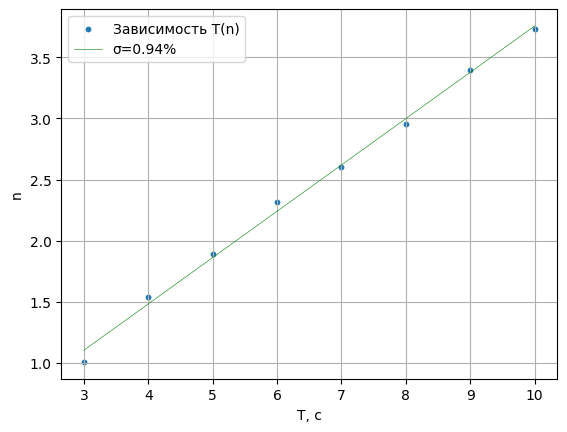

In [13]:
# график пункт 1

# график
ox = a2['n']
oy = a2['t']

plt.scatter(
  ox,
  oy,
  s=10,
  label="Зависимость T(n)"
)


z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
p1 = np.poly1d(z1)
plt.plot(ox, p1(ox), linewidth=0.4, color='green', linestyle='-', label=f'σ={round(100*res[0][0] ** 0.5, 2)}%')
print(str(p1), "\neror:", res[0][0] ** 0.5)
plt.xlabel("T, с")
plt.ylabel("n")
plt.grid()
plt.legend(loc='best')
# plt.savefig("T(n).png")
plt.show()
k = p1[1]

In [6]:
k = 0.379
delta_k = 0.00942
b_pr = m * (3*mk_b) ** -1 * (k/(2*np.pi * 2 * R))**-2
delta_b_pr = b_pr * (delta_k / k) * 2
print(100*b_pr, 100*delta_b_pr)

38.524964272675184 1.9150668255862806


In [7]:
# Задание 3. уравновешиваем всегда на последнем от края

a3 = pd.DataFrame()

a3['n'] = np.arange(4, 11, 2)
a3['m'] = ( # в г
  0.218, 0.160, .147, .134
  # 0.391, 0.267, 0.182, 0.119
)
a3['l'] = d * (a3['n'] / 2 - 1)
a3['M'] = a3['m'] * (9.81 * 100) * a3['l']
# latex(a3)
a3

,n,m,l,M
0,4,0.218,0.594,127.031652
1,6,0.160,1.188,186.468480
2,8,0.147,1.782,256.976874
3,10,0.134,2.376,312.334704


 
31.32 x + 1.457 
 error: 0.98157477


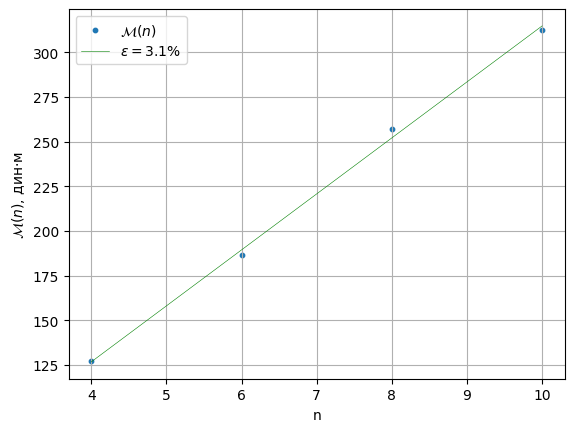

In [8]:
# график пункт 1

# график
ox = a3['n']
oy = a3['M']

plt.scatter(
  ox,
  oy,
  s=10,
  label='$\mathcal{M}(n)$'
)


z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
p1 = np.poly1d(z1)
plt.plot(ox, p1(ox), linewidth=0.4, color='green', linestyle='-', label=f'$\epsilon=${abs(round(100*(res[0][0] ** 0.5)/z1[0], 1))}%')
print(str(p1), "\n error:", round(res[0][0] ** 0.5, 8))
plt.xlabel("n")
plt.ylabel("$\mathcal{M}(n)$, дин$\cdot$м")
plt.grid()
plt.legend(loc='best')
# plt.savefig("m(n).png")
plt.show()

In [9]:
k = 31.32
delta_k = 0.98157477
b = k / mk_b
delta_b = b - (k + delta_k) / (mk_b - abs(delta_mk_b))
print(f"{b=}\n{delta_b=}")

b=0.44931610271120676
delta_b=-0.014972240413894444


In [10]:
np.arctan(b/b_pr)/(2*np.pi)*360
np.sqrt(b_pr**2 + b**2) - np.sqrt((b_pr+delta_b_pr)**2 + (b+delta_b)**2)

-0.0015961514612019556